# Titanic - Machine Learning from Disaster

# import Libraries

In [1]:
# Main file funcitons
from configs import *

# Main manipulation functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import  BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import  SGDClassifier
from sklearn.model_selection import  StratifiedKFold, GridSearchCV
from sklearn.base import  clone
from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.metrics import  confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
titanic_data = load_data('train.csv')

# Display first 5 rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Info Method

As we are just displaying the data but some things we can notice from this display like **Nan** values, some of the data are numbers, others are object string, to go forward of other information about the total memory that the data used, or the data type for each feature and which is it contains **Nan** values or not and other information about the data we can use the **info** method associated with the pandas data frame.

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# NOTE !!

So some of information we can take from this is that we have:
- 5 integers, 5 objects, 2 float columns
- we have 891 instance, but as we can see some features have **Nan**
- The memory usage can fit easily 

# Overview

From what we have got from the **info** method, it will be useful to make a pipeline for each of these data, like pipeline handle **numbers**, others for **category** and at the end, we need to combine these two pipelines together.

# Describe

Let's check first numbers data and think of these numbers how they affect the target variable, which is here is the **Survived**.

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# NOTES !!

Describe method working with numeric data, it provide you with some of statics about the feautres(columns data) you have,it work only on the existing values so nan values are ignored, it help you in like that:

- 25% of people in the dataset we have their age is smaller than 20 years.
- it help you also to know which max of each features, which help you to know if you need feature scaling.

As we can see the data have different forms, numbers, and categories, so what we need is to handle these things separately and in the end, we can combine them in one pipeline.

# Numeric Data

We will start with the numeric data, spend some time in the analysis of these numbers, fill or remove nan values, and other work that may include making these features represent data well.

### Numeric

For Numeric attributes, I have ignored Passenger Id, as it looks like an index for each instance and its order will affect the model even if it does not have any information to the model.

### Categories

For Categories attributes, I have ignored the Name of the passenger and the ticket it holds, because it does not represent actual information also to the model, and use it is just hurts our process.

### Target

Also, I have one list for the target variable.

In [5]:
# Get names of the attributes related to each pipeline we need to handle 
num_attr_names   = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass'] # reOrder attributes
target_attr_name = ['Survived']
cat_attr_names   = ['Sex', 'Embarked']
tr_cols = num_attr_names + cat_attr_names

In [6]:
# Leave the original data untouched
titanic_data_copy = titanic_data.copy()
titanic_data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Train Test Split

As we know that our analysis of the data should be compiled on part of the dataset which is the training set, then once we have done the work we use the test set to ensure that the model can work in real life or not.

The split we need is to ensure that the data split into training and testing in a way that includes each stratum (group) of points in each part of this splitting with the approximate ratio for each stratum.

In [7]:
titanic_data_copy['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
titanic_data_copy['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
titanic_data_copy['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# NOTE !!

As we can see some of the features have just 1 instance in the whole dataset so it will be in the training or in testing, so it may cause some miss learning as some data the model will see in testing and it may not see in the training or the opposite, also, split on these features may help but ignoring these outliers also can help so we have different trials we need to go forward.

Trials like:

- Try split based on Survived or SibSp or Parch or even two of these features.
- Try to remove outliers (rare instances like in Parch class 6 is just come only 1).

In [10]:
# We can see how split working well for us
stratified_tr_data, stratified_tes_data = split_data('Survived', titanic_data_copy)
error_result = check_split_error(titanic_data_copy, stratified_tes_data, stratified_tes_data, 'Survived') 
error_result

,overall,train,test,train_error,test_error
0,0.383838,0.385475,0.385475,0.001636,0.001636
1,0.616162,0.614525,0.614525,0.001636,0.001636


In [11]:
# What about Parch feautre !!
stratified_tr_data, stratified_tes_data = split_data('SibSp', titanic_data_copy)
error_result = check_split_error(titanic_data_copy, stratified_tes_data, stratified_tes_data, 'SibSp') 
error_result

,overall,train,test,train_error,test_error
0,0.005612,0.005587,0.005587,0.000025,0.000025
1,0.007856,0.005587,0.005587,0.002270,0.002270
2,0.017957,0.016760,0.016760,0.001198,0.001198
3,0.020202,0.022346,0.022346,0.002144,0.002144
4,0.031425,0.033520,0.033520,0.002094,0.002094
5,0.234568,0.234637,0.234637,0.000069,0.000069
6,0.682379,0.681564,0.681564,0.000815,0.000815


In [12]:
# # What about Parch feautre !! Uncomment to see the error
# stratified_tr_data, stratified_tes_data = split_data('Parch', titanic_data_copy)
# error_result = check_split_error(titanic_data_copy, stratified_tes_data, stratified_tes_data, 'Parch') 

# NOTE !!

As we can see it give you an error because some of the classes has just 1 instance in the overall data.

## Split is Done !! Let us Discover

Now we have separated the dataset into train and test, then we need to go forward with some of the analysis to discover new insights about the data we dealing with, and as we mentioned above we will go first with Numeric Data.

# Discover & Visualize Data to Gain Insights

Just remember to keep the test set aside, and use just the training data, and if the training data is very large you can use a sample that represents overall the data because of the computation process on the machine.


We know the target feature is the **Survived**, so what we will go on is to see this target variable with other features or even between the features itself.

In [13]:
titanic_tr = stratified_tr_data.copy()
titanic_tr_num = titanic_tr[num_attr_names]
titanic_tr_num.head()

,Age,Fare,SibSp,Parch,Pclass
799,30.0,24.1500,1,1,3
621,42.0,52.5542,1,0,1
889,26.0,30.0000,0,0,1
349,42.0,8.6625,0,0,3
335,NaN,7.8958,0,0,3


/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44497b6940>,
      dtype=object)

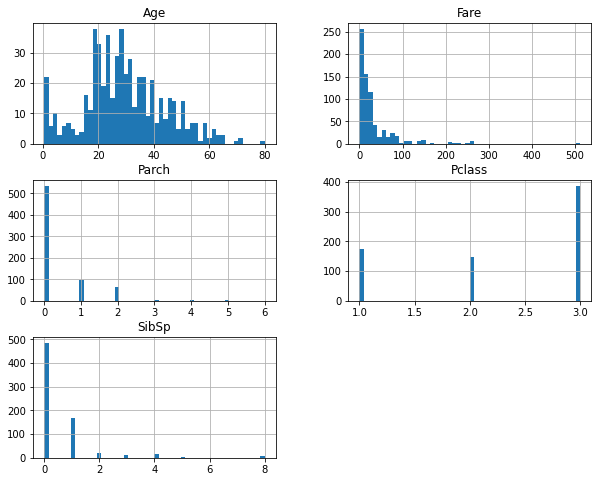

In [14]:
titanic_tr_num.hist(bins=50, figsize=(10, 8))

# From Histograms

We can see different shapes from normal distribution as **Age** to rights skewed in **Fare** and others just as numbers but it's like categorical data as it has just numbered a small number of class(discrete values).

# Notes about Columns

- parch: is children aboard the Titanic to this passenger
- sibsp: is siblings aboard the Titanic to this passenger
- fare: is the money that the passenger pay
- cabin: Cabin number
- embarked: from what place they have leave


# Note !

As most of the attributes like categorical attributes even of they are number but have a small number of discrete values, as well as the target variable is just 0 and 1.

# Correlation

Looking for how each attribute affects the target feature gives you some insights about the best attributes that describe the dataset very well as it helps a lot to predict the target, and what we have here is less correlation but we can not ignore these correlations like the positive correlation we have in **Fare** and the negative correlation with **Pclass**.

It seems that we have also a correlation between **Fare** and **Pclass** and in the meaning of logic, it seems rights because the two related what this person is, maybe have more moeny so it a place take in first-class or something else and as we can see it negative correlation. ** Let's see it**

In [15]:
corr_matrix = titanic_tr.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.253147
Parch          0.081404
PassengerId   -0.006881
SibSp         -0.040983
Age           -0.057420
Pclass        -0.331366
Name: Survived, dtype: float64

In [16]:
# As we can see the mentioned above for Fare with Pclass
corr_matrix['Fare'].sort_values(ascending=False)

Fare           1.000000
Survived       0.253147
Parch          0.231509
SibSp          0.164790
Age            0.104192
PassengerId   -0.003166
Pclass        -0.555854
Name: Fare, dtype: float64

In [17]:
corr_matrix['Age'].sort_values(ascending=False)

Age            1.000000
Fare           0.104192
PassengerId    0.029748
Survived      -0.057420
Parch         -0.189027
SibSp         -0.317241
Pclass        -0.379033
Name: Age, dtype: float64

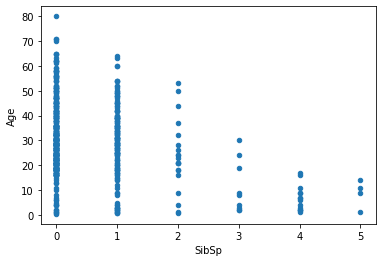

In [18]:
titanic_tr_num.plot(kind='scatter', x='SibSp', y='Age')

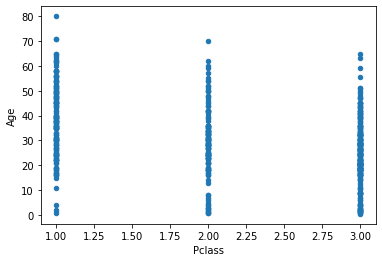

In [19]:
titanic_tr_num.plot(kind='scatter', x='Pclass', y='Age')

#  Attribute Combination

We have to remove some features because it may miss the model to learn and it will affect our model, but on the other side add some features from the features we have may help the model so we need to test like this process, and we have the two ones **Parch** and **SibSp** can be added together to new attribute represent the overall of the family numbers.

Also, the Negative correlation between **Age** and the two ones **SibSp** and **Pclass** can give us other insights.

# Scatter plot

We can see some of the outliers in the scatter plot above as some instances are going away with Age, So we have to trying with and without like these outliers, or add regularization to avoid overfitting.

# Conclusion from EDA ( Exploratory Data Analysis)

## We have 12 column:
- 3-int, 2-object, 2-float, 1-cat Target column, with 891 instances, some features contain NAN values.

## Ignore some features like:
- PassengerId Irrelevant feature
- Name Irrelevant feature
- Ticket, Irrelevant feature
- Cabin, Because most of instances has Nan values (Poor Feature)
- Try to remove also Embarked

## Dealing with Nan Values:
- For Age, Fare get mean
- For Embarked, Parch, SibSp, Pclass, Sex   get mode (most frequent values)

## Features scaling:
- Age, Fare
- Try also with and without Pclass, SibSp, Parch



## Dealing with Outliers:
- Parch feature
- SibSp feature


## Correlation:
- Fare, Pclass most effect on target
- Fare, Pclass have a medium negative correlation
- Age, SibSp, Pclass also have a medium negative correlation

## Combination:
- Add Parch to SibSp to represent overall family.

## OneHotEncoder

We need to handle nominal categorical attributes like in **Sex**.

# Handle Nan Values & outliers & Scaling features Pipeline

# Outliers

As we can see there are values that repeat once so trying with these outliers and without is a good assumption to go with, so I will try to remove the outliers class in attributes that repeated less or equal to only 10 times with the most repeated class like in case of **SibSp** replace class **5** with the class **0**.

In [20]:
def initialize_pipelines(leave_remove=False, scaling=False):
    num_imputer = ColumnTransformer([
    ('mean_imputer', SimpleImputer(strategy='mean'), num_attr_names[:2]),
    ('mode_imputer', SimpleImputer(strategy='most_frequent'), num_attr_names[2:]),
    ])
    num_pipeline = Pipeline([
        ('outliers', LeaveOrRemoveOutLiers(['SibSp', 'Parch'], leave_remove)),
        ('scaling', FeatureScale(num_attr_names, scaling)),
        ('imputer', num_imputer),
    ])


    full_pipeline = ColumnTransformer([
        ('num_pipeline', num_pipeline, num_attr_names),
        ('cat_pipeline', OneHotEncoder(), cat_attr_names),
    ])
    return full_pipeline

In [21]:
def prepare_data_for_ml(data, leave_remove=False, scaling=False):
    # Replace nan values in categorical data separately before the pipeline
    cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    cat_imputer = cat_imputer.fit_transform(data[cat_attr_names].values)
    data[cat_attr_names] = cat_imputer # replace the imputed columns
    
    full_pipeline = initialize_pipelines(leave_remove, scaling)
    data_prepared = full_pipeline.fit_transform(data)
    return data_prepared

In [22]:
titanic_tr_pipe_line = titanic_tr.copy()
titanic_tr_prepared = prepare_data_for_ml(titanic_tr_pipe_line)
target_attr = np.array(titanic_tr[target_attr_name])
titanic_tr_prepared.shape

(712, 10)

# Combination

Just after the pipelined returned with the data add the combination you need.

In [23]:
# na_scl_oulrs_pili_trfm['OverallFamily'] = na_scl_oulrs_pili_trfm['SibSp'] + na_scl_oulrs_pili_trfm['Parch']

# Select & Train a Model

The problem we dealing with is  binary classification problem.

The ways we deal with classification problems are different in the way of evaluating the model, trying to improve the result of cost function and others, this is because we looking for some discrete values just either 0 or 1 as in our problem **survived or not**.

There are different Classification models one of them is the Stochastic Gradient Descent **SGD**, and this model is working very well with the large dataset as well as with multiple classification problems, but let's going on with this model.

In [24]:
titanic_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,NaN,S
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S


In [25]:
# Take a copy of training data
titanic_tr_pipe_line = titanic_tr.copy()
titanic_tr_prepared = prepare_data_for_ml(titanic_tr_pipe_line, False, False)
titanic_tr_prepared.shape

(712, 10)

In [26]:
# The data now is looking prepared lets print some instances
titanic_tr_prepared[:3]

array([[0.37170143, 0.04713766, 1.        , 1.        , 3.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ],
       [0.52249309, 0.10257897, 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [0.32143755, 0.0585561 , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ]])

In [27]:
# Take object from SGD model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(titanic_tr_prepared, target_attr)

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDClassifier(random_state=42)

In [28]:
# Now lets predict some labels and display the actuall ones
test_3_instances = titanic_tr_prepared[:3]
predict_3_instances = sgd_clf.predict(test_3_instances)
print("The predicited labels: \n", predict_3_instances)
# as we can see how the model predicts the first and third 1 correctly while it misses the second one.
print("The actuall labels: :\n",  target_attr[:3]) 

The predicited labels: 
 [0 0 1]
The actuall labels: :
 [[0]
 [1]
 [1]]


# Performance Measurements

Evaluating the classifier is strictly tricer than evaluating regressor, we have different measurements for the classifier model, so we will spend some time in this process.

# Making accuracy using cross-validation

- First using StratifiedKFold 
- Second using cross_val_score

## using StratifiedKFold

In [29]:
skfold = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfold.split(titanic_tr_prepared, target_attr):
    clone_sgd = clone(sgd_clf)
    
    # Features
    X_train_fold = titanic_tr_prepared[train_index]
    X_test_fold  = titanic_tr_prepared[test_index]
#     # Labels 
    y_train_fold = target_attr[train_index]
    y_test_fold  = target_attr[test_index]
    
    clone_sgd.fit(X_train_fold, y_train_fold)
    y_pred = clone_sgd.predict(X_test_fold)
    y_pred = y_pred.reshape(-1,1)
    m_correct = np.sum(y_pred == y_test_fold)
    print(m_correct / len(y_test_fold))

0.38235294117647056
0.7721518987341772
0.6582278481012658


/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [30]:
# Using cross_val_score
cross_val_score(sgd_clf, titanic_tr_prepared, target_attr, cv=3, scoring="accuracy")

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.38235294, 0.7721519 , 0.65822785])

# Note 

Even that the model gives a low score of 38% and in some fold relatively high score of 77%, but actually score not the preferred performance measurements, as it looks for those who classified correct for the positive class we search for which is here the **Survived people**, but also we need to know the result from other side related to those who are not **survived**, So.

# Confusion matrix

the confusion matrix is a much better way to evaluate the performance of the classifier, it looks for the number of times instances of class A are classified as class B, in other words, the number of times the class **1** confused with the class **0**, here is the class **survived** confused with **not survived**.

To compute the confusion matrix first we need the predicted class for each instance, so instead of using **cross_val_score** will use **cross_val_predict**, it return the resul of last fold.

cross_val_predict combine the validate fold that test after training on each fold, then return one list contain the all div fold result.

In [31]:
pred = cross_val_predict(sgd_clf, titanic_tr_prepared, target_attr, cv=3)
confusion_matrix(pred, target_attr)

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[264, 100],
       [182, 166]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers 0(not survived) (the negative class): 264 of them were correctly classified as 0 (not survived) (they are called true negatives), while the remaining 100 were wrongly classified as 1 ((not survived)) (false positives). The second row considers (survived people) the (the positive class): 182 were wrongly classified as 0 (not survived) (false negatives), while the remaining 166 were correctly classified as 1 (survived people) (true positives). A perfect classifier would have only true positives and true negatives. so its confusion matrix would have nonzero values only on its main diagonal.

"The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric.**An interesting one to look at is the accuracy of the positive predictions (survived people)** this is called the precision of the classifier", or looking for sensitivity (True Positive rate) which called **Recall**, the ratio of positive instances that are correctly detected by the classifier, even that they are not correctly classified as positive.

Some times it's preferred to combine the precision and recall into a single matrix called f1_score, and this helps you to compare between two classifiers, The F1 score is the harmonic mean of precision and recall Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.

# precision & Recall & F1-score

<table><tr>
<td> <img src="images/3.png" /> </td>
<td> <img src="images/2.png" /> </td>

<td> <img src="images/1.png"/> </td>

</tr></table>




In [32]:
print(precision_score(pred, target_attr)) # its correct to detect 62% of survived people
print(recall_score(pred, target_attr)) # it detects 47% of survived people.
print(f1_score(pred, target_attr)) # only 54% is our performance of the model not as we see reach 77%

0.6240601503759399
0.47701149425287354
0.5407166123778502


# Note !

In some application you preferred to have higher precision than recall or vise verse so it depends on the application you dealing with and **unfortunately, you can’t have it both ways: increasing precision reduces recall and vice versa. This is called the precision/recall trade-off**

# Precision/Recall Trade-off

"To understand this trade-off, let’s look at how theSGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. Figure shows a few digits positioned from the lowest score on the left to the highest score on the right. Supposethe decision threshold is positioned at the central arrow (between the two 5s): you will find 4 true positives (actual 5s) on the right of that threshold, and one false positive (actually a 6). Therefore, withthat threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if you raise the threshold (move it to the arrow on the right), the false positive (the 6) becomes a true negative, thereby increasing precision (up to 100% in this case), but one true positive becomes a false negative, decreasing recall down to 50%. Conversely, lowering thethreshold increases recall and reduces precision."

<td> <img src="images/4.png" /> </td>

Scikit-Learn does not let you set the threshold directly, but you can use the decision function to know which score it used in prediction, and this can lead later as we will see to set the threshold to the value you need, to get high precision or low recall.


In [33]:
some_instance = titanic_tr_prepared[0].reshape(1, -1)
some_instance.shape

(1, 10)

In [34]:
y_score = sgd_clf.decision_function(some_instance)
threshold = 0
y_instance_pred = (y_score > threshold)

# make a correct prediction based on the threshold we set to
print(y_score)
print(target_attr[0])
print(y_instance_pred)

# What if we decrease the threshold 

threshold = -.7
y_instance_pred = (y_score > threshold)
# instead of false it have been True which is not a correct classifed
print(y_score)
print(target_attr[0])
print(y_instance_pred)


[-0.67855225]
[0]
[False]
[-0.67855225]
[0]
[ True]


# Note !

This is good but its works with just one instance, but how we can decide which threshold to use? first, we can call predict but pass to it another argument which is decision_function, and it returns a clear prediction score for each instance, what means clear is that the prediction has made on a test set that the model never sees in the training.

In [35]:
y_score = cross_val_predict(sgd_clf, titanic_tr_prepared, target_attr.reshape(-1), cv=3, method="decision_function")

In [36]:
y_score[:5]

array([5.93377192, 2.91784815, 7.30510023, 3.20068116, 4.54638987])

**Now we have the score for all instances, so we are ready to get all precision and recall for all possible thresholds associated with these instances scores.**

In [37]:
# Order of argument is must
precisions, recalls, thresholds = precision_recall_curve(target_attr, y_score)
print(precisions[:3])
print(recalls[:3])
print(thresholds[:3])

[0.37945792 0.37857143 0.37911302]
[1.        0.9962406 0.9962406]
[-8.19255848 -8.17148292 -8.16694152]


In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") # -1 because threshold is less than by 1
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()

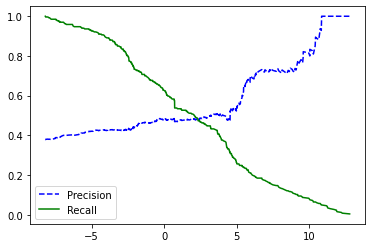

In [39]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# Note !!

We can see that how the recall is going down when the threshold is increasing, on the vise vers the precision sometimes goes up down when we increase the threshold, but at the end, as we can see it go up increasing the threshold. and this point we can get from the graph in section **Precision/Recall Trade-off**, what happens when you start from the central threshold and move it just one digit to the right: precision goes from 4/5(80%) down to 3/4 (75%), but at the end its go to 100% precisions. On the other hand, recall can only go down when the threshold is increased.

# Plot precision_vs_recall dierctly

Another way to select a good precision/recall tradeoff is to plot precision directly against recall.

Text(0.5, 1.0, 'Precision Vs Recall')

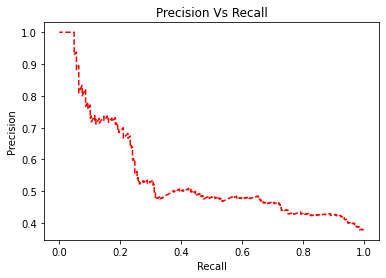

In [40]:
plt.plot(recalls, precisions, "r--")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Vs Recall")

# Note !!

If we are in case of interesting of persons, we can get precisions about 72% because its go down when recall is about 20% or less than 15%, on the other hand, the recall here will be about 15% which small recall but high precisions as we need,  but if we need the trade-off we can choose about 40% recall, which about 50% precision, it all depends on the project you are in.

**Suppose that we looking for 72% precisions, how we can get the threshold.** ?

From the graph previous of that, it shows you need a value greater than 5 thresholds, but we can search for the lowest threshold that gives at least 72% precision.

In [41]:
threshold_72_precision = thresholds[np.argmax(precisions >= .72 )]
y_pred_72_precision = (y_score >= threshold_72_precision)

print(precision_score(target_attr, y_pred_72_precision))
print(recall_score(target_attr, y_pred_72_precision))
print(f1_score(target_attr, y_pred_72_precision))

threshold_72_precision

0.7205882352941176
0.18421052631578946
0.29341317365269454


6.479522239079012

# Note !!

Actually, we can get the precision value as we need, just set a high enough threshold, but high precision as we see above is low recall, and by default, the f1_score will be low, and for the application, we work with we need to see the result in fairly way as we need the actual result of who are survived and who are not.

Also, another application may be you need high precision, like suggest videos to children, that avoid the sexual content for the child, so you have to skip some good videos low recall, **True Positive**, but keep only safe ones high precisions, so it depends on the project you dealing with.

So **If someone says “let’s reach 99% precision,” you should ask, “at what recall?”**

# The ROC Curve

Thereceiver operating characteristic (ROC) curve is another common tool used with binary classifiers.It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROCcurve plots the true positive rate(another name for recall) against the false positive rate. The FPR is theratio of negative instances that are incorrectly classified as positive. It is equal to one minus the truenegative rate, which is the ratio of negative instances that are correctly classified as negative. The TNRis also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [42]:
fpr, tpr, thresholds = roc_curve(target_attr, y_score)

In [43]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr) 
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Psoitive Rate")
    plt.ylabel("True Positive Rate (Recall or Sensitivity)")
    plt.axis([0, 1, 0, 1])

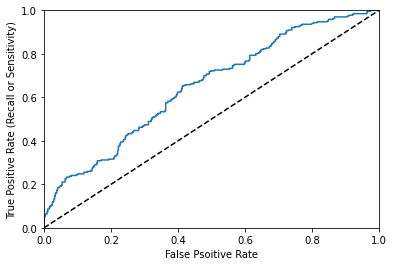

In [44]:
plot_roc_curve(fpr, tpr)

# Note !

As we can see the higher recall(TPR) means more False Positive instances that the classifer produce.

Also, we can see that a good classifier is that one besides the top left(corner) of the graph as it possible, the dashed line shows that is bad random classifier if you got.

Also, We can assume that about 20% recall is something good for low FPR, but in another application, we get high recall as we need also, but it will affect the precision as we mentioned they have **Inverse relationship **.


"Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and otherwise, use the ROC curve."

# ROC AUC

**"One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5."**

In [45]:
roc_auc_score(target_attr, y_score) # seems not good as it very far away from 1

0.6488207626690043

# Another model

As we can see it seems that the SGD model has not a good fit for the data it's underfitting the data, so we need to compare it to another model and see how this one will fit the data, we can use RandomForestClassifer, and its associated probability as in SGD descision_function to compare the ROC and ROC AUC of the two models.

In [46]:
foresr_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(foresr_clf, titanic_tr_prepared, target_attr.reshape(-1),
                                    cv=3, method="predict_proba")

# it returns 2-scores of positive and negative class

In [47]:
y_score_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_fores, thresholds_forest = roc_curve(target_attr, y_score_forest)

(0.0, 1.0, 0.0, 1.0)

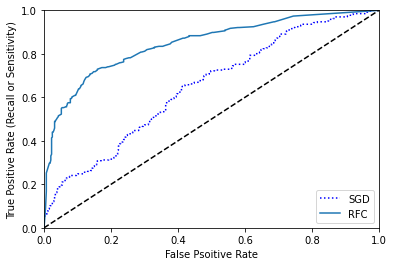

In [48]:
plt.plot(fpr, tpr, "b:", label="SGD") 
plt.plot(fpr_forest, tpr_fores, label="RFC") 
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Psoitive Rate")
plt.ylabel("True Positive Rate (Recall or Sensitivity)")
plt.legend(loc="lower right")
plt.axis([0, 1, 0, 1])

# Note !

As we can see that RFC is looking better and superior to the SGD classifier because its ROC curve is much closer to the top-left corner and actually it will has a greater AUC.

In [49]:
roc_auc_score(target_attr, y_score_forest)

0.8475125594254694

In [50]:
# Use random forest to get precision recall and f1
y_pred_forest = cross_val_predict(foresr_clf, titanic_tr_prepared, target_attr.reshape(-1), cv=3)
print(precision_score(target_attr, y_pred_forest))
print(recall_score(target_attr, y_pred_forest))
print(f1_score(target_attr, y_pred_forest))

# Also we can deal with to increase the precision as we did with SGD

0.7581967213114754
0.6954887218045113
0.7254901960784313


# Another model

In [51]:
knc_clf = KNeighborsClassifier()
y_probas_knc = cross_val_predict(knc_clf, titanic_tr_prepared, target_attr.reshape(-1),
                                    cv=3, method="predict_proba")

y_score_knc = y_probas_knc[:, 1] # score = proba of positive class
fpr_knc, tpr_knc, thresholds_knc = roc_curve(target_attr, y_score_knc)



(0.0, 1.0, 0.0, 1.0)

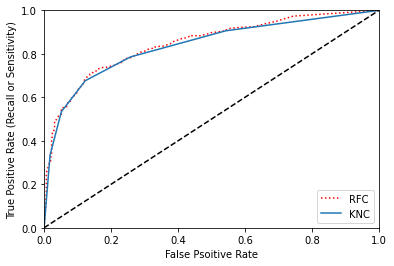

In [52]:
plt.plot(fpr_forest, tpr_fores, "r:", label="RFC") 
plt.plot(fpr_knc, tpr_knc, label="KNC") 
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Psoitive Rate")
plt.ylabel("True Positive Rate (Recall or Sensitivity)")
plt.legend(loc="lower right")
plt.axis([0, 1, 0, 1])

In [53]:
roc_auc_score(target_attr, y_score_knc) # seems that close to RFC

0.8361669307798644

# Fine Tune the Model

We have the Random and K-ne are the best ones here so we can go forward to see who the best for us.

# Note !!

**Along with that, we will test the different pipelines we have discussed above.**

In [54]:
param_grid = { 
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Take a copy of training data
titanic_tr_pipe_line = titanic_tr.copy()
titanic_tr_prepared = prepare_data_for_ml(titanic_tr_pipe_line, False, False)
print(titanic_tr_prepared.shape)
grd_search = GridSearchCV(foresr_clf, param_grid, cv=3)
grd_search.fit(titanic_tr_prepared, target_attr)

(712, 10)


/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [55]:
print(grd_search.best_params_)

{'max_features': 'auto', 'n_estimators': 100}


In [56]:
def test_RandomForestClassifier(scale = False, leave = False):
    
    titanic_tr_pipe_line = titanic_tr.copy()
    titanic_tr_prepared = prepare_data_for_ml(titanic_tr_pipe_line, scale, leave)
    print(titanic_tr_prepared.shape)

    foresr_clf1 = RandomForestClassifier(max_features='auto',n_estimators=100, random_state=42)
    predict = cross_val_predict(foresr_clf1, titanic_tr_prepared, target_attr.reshape(-1), cv=3)

    print(precision_score(target_attr, predict))
    print(recall_score(target_attr, predict))
    print(f1_score(target_attr, predict))
    return True

In [57]:
test_RandomForestClassifier(False, False)

(712, 10)
0.7581967213114754
0.6954887218045113
0.7254901960784313


True

In [58]:
test_RandomForestClassifier(True, True)

(712, 10)
0.7530864197530864
0.6879699248120301
0.719056974459725


True

In [59]:
test_RandomForestClassifier(True, False)

(712, 10)
0.7530864197530864
0.6879699248120301
0.719056974459725


True

In [60]:
test_RandomForestClassifier(False, True)

(712, 10)
0.7581967213114754
0.6954887218045113
0.7254901960784313


True

In [61]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 9, 15, 29]}]


# Take a copy of training data
titanic_tr_pipe_line = titanic_tr.copy()
titanic_tr_prepared = prepare_data_for_ml(titanic_tr_pipe_line, False, False)
print(titanic_tr_prepared.shape)

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3)
grid_search.fit(titanic_tr_prepared, target_attr.reshape(-1))

(712, 10)
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.782, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.823, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.793, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.765, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.823, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.759, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... n_neighbors=15, weights=distance, score=0.752, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] .... n_neighbors=15, weights=distance, score=0.831, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] .... n_neighbors=15, weights=distance, score=0.789, total=   0.0s
[CV] n_neighbors=29, weights=uniform .................................
[CV] ..... n_neighbors=29, weights=uniform, score=0.773, total=   0.0s
[CV] n_neighbors=29, weights=uniform .................................
[CV] ..... n_neighbors=29, weights=uniform, score=0.781, total=   0.0s
[CV] n_neighbors=29, weights=uniform .................................
[CV] ..... n_neighbors=29, weights=uniform, score=0.819, total=   0.0s
[CV] n_neighbors=29, weights=distance ................................
[CV] .... n_neighbors=29, weights=distance, score=0.765, total=   0.0s
[CV] n_neighbors=29, weights=distance ................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 9, 15, 29],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [62]:
print(grid_search.best_params_)

{'n_neighbors': 9, 'weights': 'uniform'}


In [63]:
def test_KNeighborsClassifier(scale = False, leave = False):
    
    titanic_tr_pipe_line = titanic_tr.copy()
    titanic_tr_prepared = prepare_data_for_ml(titanic_tr_pipe_line, scale, leave)
    print(titanic_tr_prepared.shape)

    knn_clf1 = KNeighborsClassifier(n_neighbors=9,weights='uniform')
    predict = cross_val_predict(knn_clf1, titanic_tr_prepared, target_attr.reshape(-1), cv=3)

    print(precision_score(target_attr, predict))
    print(recall_score(target_attr, predict))
    print(f1_score(target_attr, predict))
    return True

In [64]:
test_KNeighborsClassifier()

(712, 10)
0.8109452736318408
0.6127819548872181
0.6980728051391863


True

In [65]:
test_KNeighborsClassifier(True, True)

(712, 10)
0.8019323671497585
0.6240601503759399
0.7019027484143764


True

In [66]:
test_KNeighborsClassifier(False, True)

(712, 10)
0.8177339901477833
0.6240601503759399
0.7078891257995735


True

In [67]:
test_KNeighborsClassifier(True, False)

(712, 10)
0.7990867579908676
0.6578947368421053
0.7216494845360826


True

In [69]:
foresr_clf_lst_model = RandomForestClassifier(max_features='auto',n_estimators=100, random_state=42)
foresr_clf_lst_model.fit(titanic_tr_prepared, target_attr)

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [74]:
# Test Data
titanic_data = load_data('test.csv')
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
titanic_ts_pipe_line = titanic_data.copy()
titanic_ts_prepared = prepare_data_for_ml(titanic_ts_pipe_line, True, False)
predict = foresr_clf_lst_model.predict(titanic_ts_prepared)
len(predict)

418

In [71]:
dicts_resul = pd.DataFrame({'PassengerId': titanic_data['PassengerId'], 'Survived': predict})

In [72]:
dicts_resul.to_csv('datasets/test_result.csv', index=False)

In [73]:
test_result = pd.read_csv('datasets/test_result.csv')
test_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
